# Object Detection and Segmentation Tutorial: Part 1

**Prerequisites**

- Python ≥ 3.6
- PyTorch ≥ 1.8 and torchvision that matches the PyTorch installation
- Linux or macOS (only for detectron2)

**TODO:** for the project create new environment in conda, install correct Python and PyTorch versions 

# Inference with Torchvision Models

The first part of the tutorial aims to explain how torchvision models work. We will use an existing model from the pytorch torchvision.models module.

[Let's start from Faster R-CNN]("https://pytorch.org/vision/stable/models.html#torchvision.models.detection.fasterrcnn_resnet50_fpn")

We are using Faster R-CNN with pretrained weights on the COCO dataset.

In [1]:
import requests
from io import BytesIO

import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2

Let's first open an image from a URL

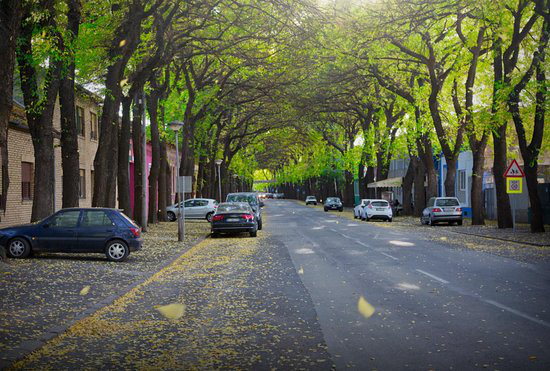

In [2]:
response = requests.get('https://media-cdn.tripadvisor.com/media/photo-s/15/26/b8/f3/generala-drapsina-street.jpg  ')
img = Image.open(BytesIO(response.content))
img

For visualization purposes let's define the class names as torchvision.models don't have it by default.

In [3]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

Next, we will use torchvision transforms to preprocess and prepare images. After these transformations, the images are ready to become the input data of the model. The following code snippet resizes the image, passes the image from PIL to Torch Tensor, and then normalizes the input.

In [4]:
transform = transforms.Compose([transforms.Resize((500, 700)),
                                        transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])



Next, let's define the model. As was mentioned above we are going to use Faster R-CNN for object detection inference. We will use *fasterrcnn_resnet50_fpn* function which consist Resnet 50 backbone and Feature Piramide Network. In addition, we define the device on which the model will run.

In [5]:
device = 'cpu'
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [6]:
# Pass the image through transformations
im_transformed = transform(img).unsqueeze(0)
im_transformed.shape

torch.Size([1, 3, 500, 700])

In [7]:
# Output of the model for the given image
predictions = model(im_transformed)[0]
predictions

/home/lilityolyan/anaconda3/envs/detection/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272068185/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


{'boxes': tensor([[221.6362, 266.7824, 276.6009, 300.4073],
         [449.5784, 267.9462, 501.1174, 300.9418],
         [284.6039, 258.1487, 335.2568, 285.8950],
         [101.1817, 384.9634, 115.7661, 399.4379],
         [262.0525, 274.3622, 332.5803, 322.6289],
         [194.4159, 405.0740, 240.5560, 437.1051],
         [539.3498, 258.6757, 590.7750, 309.0664],
         [372.3036, 301.5162, 644.7797, 461.6026],
         [410.9647, 264.6107, 438.5631, 287.1672],
         [185.3615, 298.2215, 700.0000, 477.4143],
         [ 86.3841, 315.8593, 404.9576, 459.2022]], grad_fn=<StackBackward0>),
 'labels': tensor([ 3,  3,  3, 37,  3, 16,  3,  3,  3,  3,  3]),
 'scores': tensor([0.9921, 0.9526, 0.8205, 0.6033, 0.5345, 0.5135, 0.3986, 0.3463, 0.3311,
         0.0784, 0.0628], grad_fn=<IndexBackward0>)}

Now, let's visualize the predictions.

[INFO] car: 99.21%
[INFO] car: 95.26%
[INFO] car: 82.05%
[INFO] sports ball: 60.33%
[INFO] car: 53.45%
[INFO] bird: 51.35%
[INFO] car: 39.86%
[INFO] car: 34.63%
[INFO] car: 33.11%
[INFO] car: 7.84%
[INFO] car: 6.28%


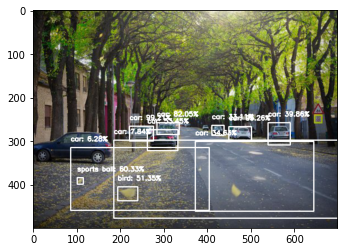

In [8]:
open_cv_image = np.array(img) 
open_cv_image = open_cv_image[:, :, ::-1].copy() 
open_cv_image = cv2.resize(open_cv_image,(700,500))


for i in range(0, len(predictions["boxes"])):

    confidence = predictions["scores"][i]

    idx = int(predictions["labels"][i])
    box = predictions["boxes"][i].detach().cpu().numpy()
    (startX, startY, endX, endY) = box.astype("int")

    label = "{}: {:.2f}%".format(COCO_INSTANCE_CATEGORY_NAMES[idx], confidence * 100)
    print("[INFO] {}".format(label))

    cv2.rectangle(open_cv_image, (startX, startY), (endX, endY), (255, 255, 255), 2)
    y = startY - 15 if startY - 15 > 15 else startY + 15
    cv2.putText(open_cv_image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

plt.imshow(open_cv_image[:,:,::-1])
plt.show()

As you can see in the image above, we have a lot of boxes with lower confidence. We can define a threshold to remove them and keep only high confidence predictions.

[INFO] car: 99.21%
[INFO] car: 95.26%
[INFO] car: 82.05%
[INFO] sports ball: 60.33%
[INFO] car: 53.45%
[INFO] bird: 51.35%


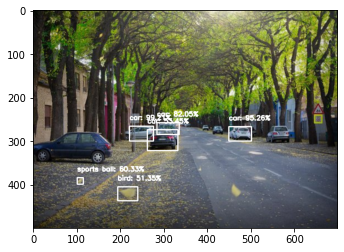

In [9]:
open_cv_image = np.array(img) 
open_cv_image = open_cv_image[:, :, ::-1].copy() 
open_cv_image = cv2.resize(open_cv_image,(700,500))

img = cv2.imread('inference_image.jpg')
img = cv2.resize(img,(700,500))
for i in range(0, len(predictions["boxes"])):

    confidence = predictions["scores"][i]
    if confidence > 0.5:
        idx = int(predictions["labels"][i])
        box = predictions["boxes"][i].detach().cpu().numpy()
        (startX, startY, endX, endY) = box.astype("int")

        label = "{}: {:.2f}%".format(COCO_INSTANCE_CATEGORY_NAMES[idx], confidence * 100)
        print("[INFO] {}".format(label))

        cv2.rectangle(img, (startX, startY), (endX, endY), (255, 255, 255), 2)
        y = startY - 15 if startY - 15 > 15 else startY + 15
        cv2.putText(img, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

plt.imshow(img[:,:,::-1])
plt.show()

Now you know how to use ready models and pretrained weights for inference. But how do you fine tune the model for your custom dataset? We will learn about this in the next part of the tutorial.